In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('mutagenicity_kNN.csv')  # Replace with the correct filename
print(data.head())  # View the first few rows
print(data.info())  # Check data types and non-null values


   Unnamed: 0  Id       CAS                     SMILES    Status  \
0           0   1  100-00-5   O=[N+]([O-])c1ccc(cc1)Cl  Training   
1           1   2  100-01-6    O=[N+]([O-])c1ccc(N)cc1  Training   
2           2   3  100-02-7    O=[N+]([O-])c1ccc(O)cc1  Training   
3           3   4  100-11-8  O=[N+]([O-])c1ccc(cc1)CBr  Training   
4           4   5  100-12-9   O=[N+]([O-])c1ccc(cc1)CC  Training   

   Experimental value Predicted value  NumValenceElectrons       qed   TPSA  \
0                   1               1                   52  0.463602  43.14   
1                   1               1                   52  0.359544  69.16   
2                   0               1                   52  0.470728  63.37   
3                   1               0                   58  0.432586  43.14   
4                   0               0                   58  0.479785  43.14   

     MolMR  BalabanJ     BertzCT    MolWt  MolLogP  
0  38.1064  3.003401  244.429658  157.556   2.2482  
1  37.5088

In [3]:
# Check for missing values
print(data.isnull().sum())




Unnamed: 0             0
Id                     0
CAS                    0
SMILES                 0
Status                 0
Experimental value     0
Predicted value        0
NumValenceElectrons    0
qed                    0
TPSA                   0
MolMR                  0
BalabanJ               0
BertzCT                0
MolWt                  0
MolLogP                0
dtype: int64


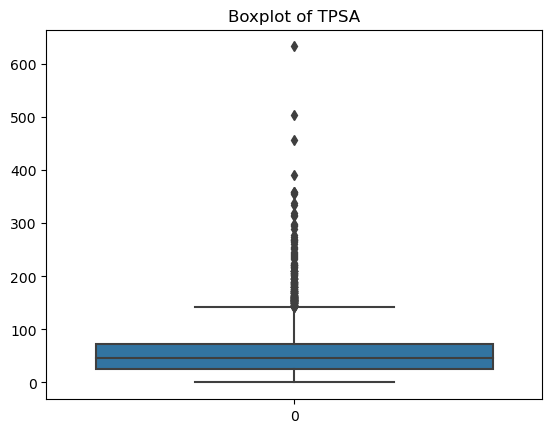

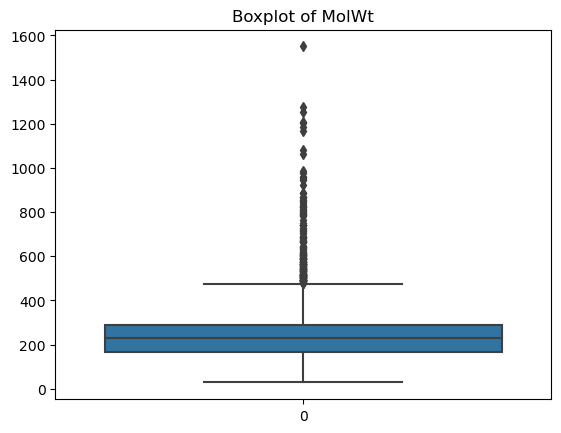

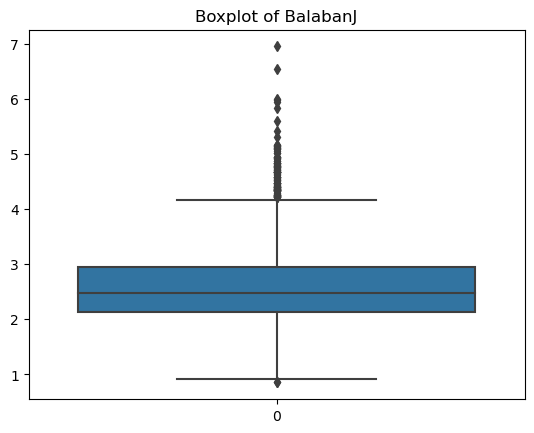

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot for each feature
for column in ['TPSA', 'MolWt', 'BalabanJ']:
    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")
    plt.show()


In [5]:
# Selecting features and target
features = ['TPSA', 'MolWt', 'BalabanJ', 'qed', 'NumValenceElectrons']
target = 'Experimental value'

# Filter dataset for training
df = data[data['Status'] == 'Training']
X = df[features]
y = df[target]



In [6]:
from sklearn.model_selection import train_test_split

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Setting up grid search
param_grid = {'n_neighbors': list(range(1, 31))}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameter
best_k = grid_search.best_params_['n_neighbors']
best_f1_score = grid_search.best_score_


In [9]:
# Training the model with the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=17)

In [10]:
from sklearn.metrics import classification_report, f1_score

# Model evaluation
y_pred = best_knn.predict(X_test_scaled)
f1_test = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Results
print(f"Best k: {best_k}")
print(f"F1-Score on Test Data: {f1_test}")
print("Classification Report:")
print(report)


Best k: 17
F1-Score on Test Data: 0.7280701754385965
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.56      0.60       503
           1       0.69      0.77      0.73       650

    accuracy                           0.68      1153
   macro avg       0.67      0.66      0.67      1153
weighted avg       0.67      0.68      0.67      1153

